# Exercise notebook 4: Grouping your data

This Jupyter notebook, for Week 4 of The Open University's [_Learn to code for Data Analysis_](http://futurelearn.com/courses/learn-to-code) course, contains code examples and coding activities for you.

In Week 4, you'll come across steps directing you to this notebook. Once you've done the exercise, go back to FutureLearn to discuss it with your fellow learners and course facilitators and mark it as complete. Remember to run the code in this notebook before you start.

## Exercise 1: Getting Comtrade data into your notebook

In this exercise, you will practice loading data from Comtrade into a pandas dataframe and getting it into a form where you can start to work with it. 

The following steps and code are an example. Your task for this exercise is stated at the end, after the example.

Generate a URL that makes a request to the Comtrade API for data about **monthly** *imports* and *exports* for all of 2014 for the dairy products *Milk and cream, neither concentrated nor sweetened (code 0401)* and *Milk and cream, either concentrated or sweetened (code 0402)*. The reporter is the **United Kingdom**, and the partners are **All**. Edit the URL so that it returns up to 5000 records (set `max=5000`) in the CSV format (`&fmt=csv`).


In [1]:
%matplotlib inline
from pandas import *
URL='http://comtrade.un.org/api/get?max=5000&type=C&freq=M&px=HS&ps=2014&r=826&p=all&rg=1%2C2&cc=0401%2C0402&fmt=csv'

Load the data in from the URL, ensuring that the various codes are read as strings. Preview the first few rows of the dataset.

In [2]:
milk=read_csv(URL,dtype={'Commodity Code':str, 'Reporter Code':str})
milk.head(3)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2014,201401,January 2014,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,22404316,NaN,21950747,NaN,NaN,0
1,HS,2014,201401,January 2014,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,60497363,NaN,46923551,NaN,NaN,0
2,HS,2014,201402,February 2014,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,18951778,NaN,18685555,NaN,NaN,0


Limit the columns to make the dataframe easier to work with by selecting just a subset of them.

In [19]:
COLUMNS=['Year', 'Period','Trade Flow','Reporter', 'Partner', 'Commodity','Commodity Code','Trade Value (US$)']
milk=milk[COLUMNS]


Derive two new dataframes that separate out the 'World' partner data and the data for individual partner countries.

In [4]:
milk_world=milk[milk['Partner'] == 'World']
milk_countries=milk[milk['Partner'] != 'World']

You may wish to store a local copy as a CSV file, for example:

In [5]:
milk_countries.to_csv('countrymilk.csv', index=False)

To load the data back in:

In [6]:
load_test=read_csv('countrymilk.csv',dtype={'Commodity Code':str, 'Reporter Code':str})
load_test.head(2)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2014,201407,Exports,United Kingdom,Afghanistan,"Milk and cream, neither concentrated nor sweet...",0401,4017
1,2014,201406,Exports,United Kingdom,Afghanistan,"Milk and cream, neither concentrated nor sweet...",0401,13150


If you are on a Windows computer, data files may sometimes be saved using a file encoding (*Latin-1*) that pandas does not recognise by default, causing you to see a `UnicodeDecodeError`.

In such cases, opening files in `read_excel()` or `read_csv()` using the parameter  `encoding="ISO-8859-1"` or  `encoding = "Latin-1"` should fix the problem. For example, edit the previous command to read:

`load_test=read_csv('countrymilk.csv', dtype={'Commodity Code':str}, encoding = "ISO-8859-1")`

### Subsetting Your Data
For large or heterogenous datasets, it is often convenient to create subsets of the data. To further separate out the imports:


In [7]:
milk_imports=milk_countries[milk_countries['Trade Flow']=='Imports']
milk_countries_imports=milk_countries[milk_countries['Trade Flow']=='Imports']
milk_world_imports=milk_world[milk_world['Trade Flow']=='Imports']

### Sorting the data

Having loaded in the data, find the most valuable partners in terms of import trade flow during a particular month by sorting the data by *decreasing* trade value and then selecting the top few rows.

In [8]:
milkImportsInJanuary2014=milk_countries_imports[milk_countries_imports['Period']==201401]
milkImportsInJanuary2014.sort('Trade Value (US$)',ascending=False).head(10)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
700,2014,201401,Imports,United Kingdom,Ireland,"Milk and cream, neither concentrated nor sweet...",0401,10676138
461,2014,201401,Imports,United Kingdom,France,"Milk and cream, concentrated or sweetened",0402,8020014
688,2014,201401,Imports,United Kingdom,Ireland,"Milk and cream, concentrated or sweetened",0402,5966962
990,2014,201401,Imports,United Kingdom,Netherlands,"Milk and cream, concentrated or sweetened",0402,4650774
511,2014,201401,Imports,United Kingdom,Germany,"Milk and cream, concentrated or sweetened",0402,4545873
137,2014,201401,Imports,United Kingdom,Belgium,"Milk and cream, neither concentrated nor sweet...",0401,4472349
155,2014,201401,Imports,United Kingdom,Belgium,"Milk and cream, concentrated or sweetened",0402,3584038
356,2014,201401,Imports,United Kingdom,Denmark,"Milk and cream, neither concentrated nor sweet...",0401,2233438
1318,2014,201401,Imports,United Kingdom,Spain,"Milk and cream, concentrated or sweetened",0402,1850097
449,2014,201401,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1522872


### Task

To complete these tasks you could copy this notebook and amend the code or create a new notebook to do the analysis for your chosen data.

Using the [Comtrade Data website](http://comtrade.un.org/data/), identify a dataset that describes the import and export trade flows for a particular service or form of goods between your country (as reporter) and all ('All') the other countries in the world. Get the monthly data for all months in 2014.

Using the Comtrade API ('View API' link), pull this data into a pandas dataframe and create an easier to work with dataframe that excludes data associated with the 'World' partner. Sort this data to see which countries are the biggest partners in terms of import and export trade flow.

In [25]:
%matplotlib inline

from pandas import *
palmOilURL = "http://comtrade.un.org/api/get?max=5000&type=C&freq=M&px=HS&ps=2014&r=826&p=all&rg=all&cc=1511&fmt=csv"

# we need to coerce some numbers so they're not reformatted by Pandas
dataConversion = {'Commodity Code':str, 'Reporter Code':str}

palmOil = read_csv(palmOilURL, dtype=dataConversion)

# just a peek
palmOil.head(2)

palmOil.__class__

pandas.core.frame.DataFrame

In [11]:
### Now let's save it somewhere to avoid downloading it all the time:

# we call a method on the DF itself, but we make sure we don't save the index generated when we loaded it
palmOil.to_csv('palm-oil.csv', index=False)


In [ ]:
# We now have it safe so lets continue.

#### If this is playing silly buggers, try checking the `.__class__` of your dataframe.

In [30]:
COLUMNS=['Year', 'Period','Trade Flow','Reporter', 'Partner', 'Commodity','Commodity Code','Trade Value (US$)']

milk=milk[COLUMNS]
palmOil = palmOil[COLUMNS]



### We're now splitting out two dataframes as we don't want the world figures right now

In [32]:
#milk_world=milk[milk['Partner'] == 'World']
#milk_countries=milk[milk['Partner'] != 'World'] 

palmOilWorld = palmOil[palmOil["Partner"] == "World"]
palmOilCountries = palmOil[palmOil["Partner"] != "World"]

We'll probably want to save these smaller dataframes too, so let's do that, with the `to_csv` function

In [33]:
palmOilWorld.to_csv('palm-oil-world.csv', index=False)
palmOilCountries.to_csv('palm-oil-countries.csv', index=False)

In the next step, they make _even more_ subsets from the current subdivided dataframes

In [36]:
#milk_imports = milk_countries[milk_countries['Trade Flow']=='Imports']
#milk_countries_imports = milk_countries[milk_countries['Trade Flow']=='Imports']
#milk_world_imports = milk_world[milk_world['Trade Flow']=='Imports']

palmOilImports = palmOil[palmOil["Trade Flow"] == 'Imports']
palmOilCountriesImports = palmOilCountries[palmOilCountries['Trade Flow'] == 'Imports']
palmOilWorldImports = palmOilWorld[palmOilWorld['Trade Flow'] == 'Imports']

So, the next step is to create _yet another subset_, so it can be sorted

In [38]:
# milkImportsInJanuary2014 = milk_countries_imports[milk_countries_imports['Period']==201401]

# milkImportsInJanuary2014.sort('Trade Value (US$)',ascending=False).head(10)

palmOilImportsInNov2014 = palmOilImports[palmOilImports['Period'] == 201411]

TIL - You have to be careful about the datatypes when making subsets. This won't work, becuase you're comparing a string to an integer.

In [39]:
palmOilImportsInNov2014 = palmOilImports[palmOilImports['Period'] == '201411']


TypeError: invalid type comparison

If in doubt, don't forget the you can check the datatypes on a dataframe. Doing so lets you see what type of comparison you need to peel off your preferred subset

In [42]:
palmOilImports.dtypes

Year                  int64
Period                int64
Trade Flow           object
Reporter             object
Partner              object
Commodity            object
Commodity Code       object
Trade Value (US$)     int64
dtype: object

So, back to creating our dataframe of the top trading partners for palmoil with the UK

In [44]:
palmOilImportsInNov2014.sort("Trade Value (US$)", ascending=False).head(5)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
380,2014,201411,Imports,United Kingdom,World,"Palm oil and its fractions, not chemically mod...",1511,12451432
403,2014,201411,Imports,United Kingdom,Netherlands,"Palm oil and its fractions, not chemically mod...",1511,5237675
406,2014,201411,Imports,United Kingdom,Papua New Guinea,"Palm oil and its fractions, not chemically mod...",1511,2515367
396,2014,201411,Imports,United Kingdom,Indonesia,"Palm oil and its fractions, not chemically mod...",1511,2067083
400,2014,201411,Imports,United Kingdom,Malaysia,"Palm oil and its fractions, not chemically mod...",1511,1910889


And you can see, Netherl.. WHUH? The UK gets most of its palm oil from the Netherlands?!? Is this a holdover from the colonial days?

Let's make a graph, so we don't forget how.

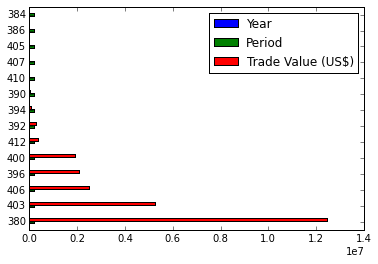

In [57]:
# palm oil november graph, geddit?
pong = palmOilImportsInNov2014.sort("Trade Value (US$)", ascending=False)
trade = palmOilImportsInNov2014["Trade Value (US$)"]
partner = palmOilImportsInNov2014["Partner"]
pong.plot(kind='barh')

this isn't the graph I want. I don't know how to only show the partners in the y axis, and trade in the x-axis without triggering this error:

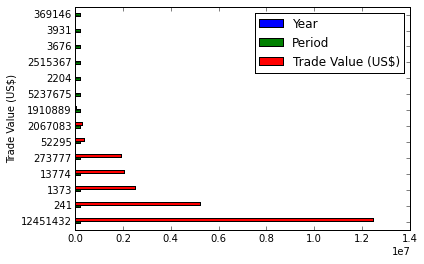

In [59]:
pong.plot(kind='barh', x=trade)

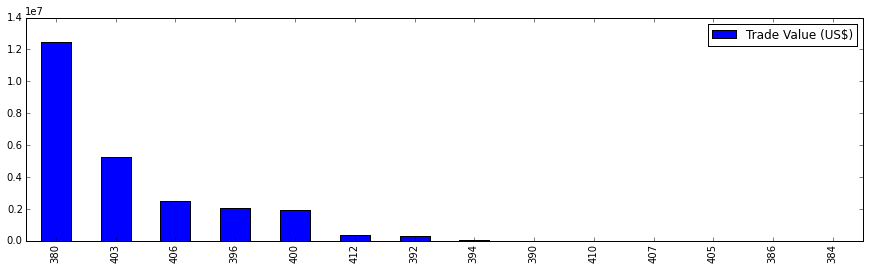

In [63]:
newPong = pong[["Trade Value (US$)", "Partner"]]
newPong.plot(kind='bar', figsize=(15, 4))

Okay, so the problem is that we aren't using the correct index, for the countries?

Okay, that's fixable:

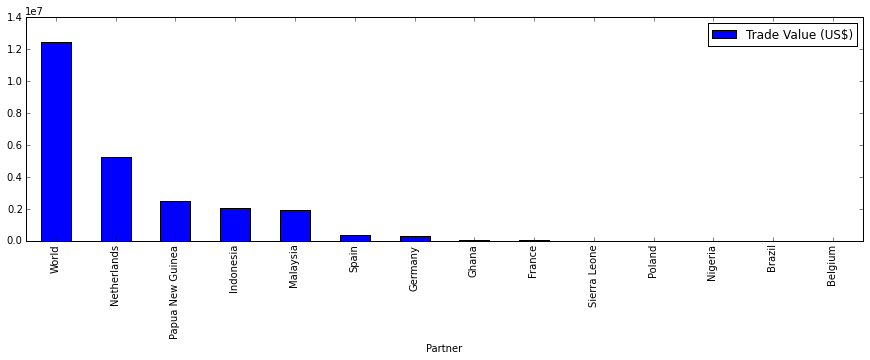

In [67]:
newPong.index = newPong["Partner"]
newPong.plot(kind='bar', figsize=(15, 4))

Lets get rid of the world:

In [73]:

#newPongNoWorld.plot(kind='bar', figsize=(15,4))
newPong.dtypes


Trade Value (US$)     int64
Partner              object
dtype: object

In [77]:
newPong[newPong["Partner"] != "World"].plot(kind='bar', figsize=(15, 4))

,Trade Value (US$),Partner
Partner,,
Netherlands,5237675,Netherlands
Papua New Guinea,2515367,Papua New Guinea
Indonesia,2067083,Indonesia
Malaysia,1910889,Malaysia
Spain,369146,Spain
Germany,273777,Germany
Ghana,52295,Ghana
France,13774,France
Sierra Leone,3931,Sierra Leone


**Now go back to the Exercise 1 step in FutureLearn to discuss and mark it complete.**

## Exercise 2: Grouping data

On many occasions, a dataframe may be organised as groups of rows where the group membership is identified based on cell values within one or more 'key' columns. **Grouping** refers to the process whereby rows associated with a particular group are collated so that you can work with just those rows as distinct subsets of the whole dataset.

The number of groups the dataframe will be split into is based on the number of unique values identified within a single key column, or the number of unique combinations of values for two or more key columns.

The `groupby()` method runs down each row in data frame, splitting the rows into separate groups based on the unique values associated with the key column or columns.

The following is an example of the steps and code needed to split the dataframe from the Exercise 1 example. 

### Grouping the data

Split the data into two different subsets of data (imports and exports), by grouping on trade flow.

In [ ]:
groups = milk_countries.groupby('Trade Flow')

Inspect the first few rows associated with a particular group:

In [ ]:
groups.get_group('Imports').head()

As well as grouping on a single term, you can create groups based on multiple columns by passing in several column names as a list. For example, generate groups based on commodity code *and* trade flow, and then preview the keys used to define the groups.

In [ ]:
GROUPING_COMMFLOW = ['Commodity Code','Trade Flow']

groups = milk_countries.groupby(GROUPING_COMMFLOW)
groups.groups.keys()

Retrieve a group based on multiple group levels by passing in a tuple that specifies a value for each index column. For example, if a grouping is based on the `'Partner'` and `'Trade Flow'` columns, the argument of `get_group` has to be a partner/flow pair, like `('France', 'Import')` to  get all rows associated with imports from France.

In [ ]:
GROUPING_PARTNERFLOW = ['Partner','Trade Flow']
groups = milk_countries.groupby(GROUPING_PARTNERFLOW)

GROUP_PARTNERFLOW= ('France','Imports')
groups.get_group( GROUP_PARTNERFLOW )

To find the leading partner for a particular commodity, group by commodity, get the desired group, and then sort the result.

In [ ]:
groups = milk_countries.groupby(['Commodity Code'])
groups.get_group('0402').sort("Trade Value (US$)", ascending=False).head()

### Task

Using your own data set from Exercise 1, try to group the data in a variety of ways, finding the most significant trade partner in each case:

- by commodity, or commodity code
- by trade flow, commodity and year.

**Now go back to the Exercise 2 step in FutureLearn to discuss and mark it complete.**

## Exercise 3: Experimenting with Split-Apply-Combine – Summary reports

Having learned how to group data using the `groupby()` method, you will now start to put those groups to work.

### Aggregation operations – Generating *Summary* reports

Aggegration operations can be invoked using the `aggregate()` method.

To find the total value of imports traded for each commodity within the period, take the world dataframe, and sum the values over the trade value column within each grouping.

In [ ]:
milk_world_imports.groupby('Commodity Code')['Trade Value (US$)'].aggregate(sum)

So that's 222 million dollars or so on the 0401 commodity, and 341 million dollars or so on 0402.

If you total (sum) up all the individual country contributions, you should get similar amounts.

In [ ]:
milk_imports_grouped=milk_countries_imports.groupby('Commodity Code')
milk_imports_grouped['Trade Value (US$)'].aggregate(sum)

Not far off – there are perhaps a few rounding errors that would account for the odd couple of million that appear to be missing...

###Finding top ranked elements within a group

To find the leading import partners across all the milk products, group by partner, sum (total) the trade value within each group, and then sort the result in descending order before displaying the top few entries.

In [ ]:
milk_countries_imports_totals=milk_countries_imports.groupby('Partner')[['Trade Value (US$)']].aggregate(sum)
milk_countries_imports_totals.sort('Trade Value (US$)', ascending=False).head()

### Generating simple charts

One of the useful features of the `aggregate()` method is that it returns an object that can be plotted from directly, in this example a horizontal bar chart.

In [ ]:
milk_imports_grouped['Trade Value (US$)'].aggregate(sum).plot(kind='barh')

### Generating alternative groupings

Reports can also be generated to show the total imports per month for each commodity: group on commodity, trade flow and period, and then sum the trade values contained within each group.

In [ ]:
monthlies=milk_countries_imports.groupby(['Commodity','Trade Flow','Period'])['Trade Value (US$)'].aggregate(sum)
monthlies

The `groupby()` method *splits* the data into separate distinct groups of rows, and then the `aggregate()` method takes each group of rows from the results of the `groupby()` operation, *applies* the specified aggregation function, and then *combines* the results in the output. 

The aggregation function itself is applied to all columns of an appropriate type. In the example, the only numeric column that makes sense to aggregate over is the trade value column.

As well as built in summary operations, such as finding the total (`sum`), or maximum or minimum value in a group (`max`, `min`), aggregating functions imported from other Python packages can also be used. As shown in the next example, the `numpy` package has a function `mean` that will calculate the mean (simple average) value for a set of values.

### Generating several aggregation values at the same time
To generate several aggregate reports in a single line of code, provide a list of several aggregating operations to the `aggregate()` method:

In [ ]:
from numpy import mean

GROUPING_COMMFLOWPERIOD=['Commodity','Trade Flow','Period']
milk_countries.groupby(GROUPING_COMMFLOWPERIOD)['Trade Value (US$)'].aggregate([sum, min, max, mean])

By combining different grouping combinations and aggregate functions, you can quickly ask a range of questions over the data or generate a wide variety of charts from it.

Sometimes, however,  it can be quite hard to see any 'outstanding' values in a complex pivot table. In such cases, a chart may help you see which values are significantly larger or smaller than the other values.

For example, plot the maximum value by month across each code/period combination to see which month saw the maximum peak flow of imports from a single partner.

In [ ]:
milk_countries_imports.groupby(['Commodity Code','Period'])['Trade Value (US$)'].aggregate(max).plot(kind='barh')

For the 0401 commodity, the largest single monthly trade flow in 2014 appears to have taken place in September (201409). For the 0402 commodity, the weakest month was December, 2014.

To chart the mean trade flows by month, simply aggregate on the *mean* rather than the `max`.

In some cases, you might want to sort the order of the bars in a bar chart by value. By default, the `sort()` operator sorts a series or dataframe 'in place'. That is, it sorts the dataframe and doesn't return anything. Use the `inplace=False` parameter to return the sorted values so that the plot function can work on them, or alternatively use the `order()` function.

The following chart displays the total imports for the combined commodities by partner (including the *World* partner) for the top five partners: the `sort()` element sorts the values in descending order, passes them to the `head()` element, which selects the top five and passes those onto the plotting function.

In [ ]:
milk_bypartner_total=milk.groupby(['Partner'])['Trade Value (US$)'].aggregate(sum)
milk_bypartner_total.sort('Trade Value (US$)',inplace=False,ascending=False).head(5).plot(kind='barh')
#milk_bypartner_total.order('Trade Value (US$)',ascending=False).head(5).plot(kind='barh')

### Tasks

For the 0402 trade item, which months saw the greatest average (mean) activity? How does that compare with the maximum flows in each month? How does it compare with the total flow in each month?

Download your own choice of monthly dataset over one or two years containing both import and export data. (To start with, you may find it convenient to split the data into two dataframes, one for exports and one for imports.)

Using your own data:

- find out which months saw the largest total value of imports, or exports? 
- assess, by eye, if there appears to be any seasonal trend in the behaviour of imports or exports?
- plot a bar chart showing the top three importers or exporters of your selected trade item over the period you grabbed the data for, compared to the total world trade value.


**Now go back to the Exercise 3 step in FutureLearn to discuss and mark it complete.**

## Exercise 4: Filtering groups

If you have a large dataset that can be split into multiple groups but for which you only want to report on groups that have a particular property, the `filter()` method can be used to apply a test to a group and only return rows from groups that pass a particular group-wide test. If the test evaluates as `False`, the rows included in that group will be ignored.

Consider the following simple test dataset:

In [ ]:
df = DataFrame({'Commodity' : ['Fish', 'Milk', 'Eggs', 'Fish', 'Milk'],
                'Trade Flow' : ['Import', 'Import', 'Import', 'Export','Export'],
                'Value' : [1,2,4,8,16]})
df

One reason for filtering a dataset might be to exclude 'sparse' or infrequently occurring items, such as trade partners who only seem to trade for less than six months of the year.

To select just the groups that contain more than a certain number of rows, define a function to test the length (that is, the number of rows) of each group and return a `True` or `False` value depending on the test.

In the following case, group by trade flow and only return rows from groups containing three or more rows.

In [ ]:
def groupsOfThreeOrMoreRows(g):
    return len(g) >= 3

df.groupby('Trade Flow').filter(groupsOfThreeOrMoreRows)

You can also select groups based on other group properties. For example, you might select just the groups where the total value for a particular column within a group exceeds a certain threshold.

In the following case, select just those commodities where the sum of import and export values is greater than a certain amount to indicate which ones have a large value of trade, in whatever direction, associated with them. First group by the commodity, then filter on the group property of interest.

In [ ]:
def groupsWithValueGreaterThanFive(g):
    return g['Value'].sum() > 5

df.groupby('Commodity').filter(groupsWithValueGreaterThanFive)

### Filtering on the Comtrade data

Now try filtering the Comtrade data relating to the milk imports. Start by creating a subset of the data containing only rows where the total trade value of imports for a particular commodity and partner is is greater than $25 million (that is, 25000000).

In [ ]:
def groupsWithImportsOver25million(g):
    return g['Trade Value (US$)'].sum() > 25000000

rows=milk_countries_imports.groupby(['Commodity','Partner']).filter(groupsWithImportsOver25million)

Check the filtering by grouping on the commodity and partner and summing the result.

In [ ]:
rows.groupby(['Commodity','Partner'])['Trade Value (US$)'].aggregate(sum)

As before, you can plot the results.

In [ ]:
rows.groupby(['Commodity','Partner'])['Trade Value (US$)'].aggregate(sum).sort('Trade Value (US$)',inplace=False,ascending=False).plot(kind='barh')

Logical tests can be combined in a filter function, for example testing for partners that only appear to trade infrequently *or* for small total amounts in any particular commodity.

In [ ]:
def weakpartner(g):
    return len(g)<=3 | g['Trade Value (US$)'].sum()<25000

weak_milk_countries_imports=milk_countries_imports.groupby(['Commodity','Partner']).filter(weakpartner)
weak_milk_countries_imports.groupby(['Commodity','Partner'])[['Trade Value (US$)']].aggregate([len,sum])

In this report, many of the listed countries appear to have traded in only one or two months; but while Hungary traded concentrated/sweetened products eight times, the total trade value was not very significant at all.

### Tasks

Filter the dataset so that it only contains rows where the total exports across all the milk products for a particular country are at least two million dollars in any given monthly period. (HINT: group on partner and period and filter against a function that tests the minimum trade value exceeds the required value.)

Generate a chart from that dataset that displays the sum total trade value for each partner. (HINT: group on the partner and then aggregate on the sum.)

Using your own monthly data for a single year, which countries only trade in your selected trade item rarely or for small amounts? Which partners trade on a regular basis (for example, in at least nine of the months)? 

Can you also find countries that trade regularly but only for small amounts (for example whose maximum monthly trade value is less than a certain threshold amount) or who trade infrequently but for large amounts (or other combinations thereof)?

**Now go back to the Exercise 4 step in FutureLearn to discuss and mark it complete.**

## Exercise 5: Interactive pivot table

The interactive pivot table contains a fragment of the milk data downloaded from Comtrade relating to the leading partner importers of milk products to the UK. (**Note:** If you can't see the pivot table, check you have downloaded it to the same folder as this notebook and run the cell below.)

Configure the pivot table by dragging the labels into the appropriate row and column selection areas. (You do not need to add all the labels to those areas). Select the aggregation type using the calculation list (which defauts to *count*). Click on the down arrow associated with a label in order to select a subset of values associated with that label.

Use the interactive pivot table to generate reports that display:

- a single column containing the total value of each trade flow for each commodity  each year (in rows: Year, Commodity, Trade Flow; no columns; sum Trade Value(US$))
- for each year and each commodity, a column containing the total trade value by Trade flow (rows: year, commodity; cols Trade Flow; sum trade value)
- the total exports for each partner country (rows) by year (columns). Row: partner, trade flow with filter set to export); col: year; sum trade value

In [ ]:
from IPython.display import HTML,IFrame

IFrame('comtrade_pivot.html',width=1000,height=600)


## Task

Try to come up with some of your own questions and then see if you can use the pivot table to answer them.

For example, see if you can use the table to find:

- the total value by partner country of each commodity type (with each row corresponding to a particular country)
- the total value of trade in commodity type for each month of the year
- the leading partners associated with the 0402 commodity code
- the minimum trade value, by month and commodity type, for Ireland.


**Now go back to the Exercise 5 step in FutureLearn to discuss and mark it complete.**

## Exercise 6: Pivot tables with pandas


Pivot tables can be quite hard to understand, so if you want a gentle dataset to pratice with, here is the simple example dataset used in the previous step that you can try out a few pivot table functions on.

In [ ]:
#Example dataframe
df = DataFrame({"Commodity":["A","A","A","A","B","B","B","C","C"],
                  "Amount":[10,15,5,20,10,10,5,20,30],
                  "Reporter":["P","P","Q","Q","P","P","Q","P","Q"],
                  "Flow":["X","Y","X","Y","X","Y","X","X","Y"]},
                 columns=["Commodity","Reporter","Flow","Amount"])

df

### Getting started with pivot tables in pandas 

The pandas library provides a `pivot_table()` function into which you can pass the elements needed to define the pivot table view you would like to generate over a particular dataset.

If you inspect the documentation for the pandas `pivot_table()` function, you will see that it is quite involved (but *DON'T PANIC!*).

In [ ]:
##Inspect the documentation for the pandas pivot_table() function
##Uncomment the following command (remove the #) and then click the play button in the toolbar to run the cell
#?pivot_table
##The documentation file should pop up from the bottom of the browser.
##Click the x to close it.

You can start to use the pivot table quite straightforwardly, drawing inspiration from the way you configured the interactive pivot table. The function itself takes the form:

`pd.pivot_table(DATAFRAME,
                index= (LIST_OF_)DATA_COLUMN(S)_THAT_DEFINE_PIVOT_TABLE_ROWS,
                columns= (LIST_OF_)DATA_COLUMN(S)_THAT_DEFINE_PIVOT_TABLE_COLUMNS
                values= DATA_COLUMN_TO_APPLY_THE SUMMARYFUNCTION_TO,
                aggfunc=sum
               )`


You can generate a pivot table that shows the total trade value as a single column, grouped into row based subdivisions based on year, country, trade flow and commodity in the following way.

The following pivot table reports on a subset of countries. The `isin()` method selects rows whose partner value 'is in' the list of specified partners.

In [ ]:
KEYPARTNERS=['Belgium','France','Germany','Ireland','Netherlands','Denmark']
milk_keypartners = milk_countries[milk_countries['Partner'].isin(KEYPARTNERS)]

pivot_table(milk_keypartners,
               index=['Year','Partner','Trade Flow','Commodity'],
               values='Trade Value (US$)',
               aggfunc=sum)

If you just want to use a single data column from the original dataset to specify the row (that is, the `index`) groupings or the column groupings, you don't need to use a list, just pass in the name of the appropriate original data column.

So, to look at rows grouped by year, country and commodity, and split columns out by trade flow:

In [ ]:
#For convenience, let's assign the output of this pivot table operation to a variable...
report=pivot_table(milk_keypartners,
               index=['Year','Partner','Commodity'],
               columns='Trade Flow',
               values='Trade Value (US$)',
               aggfunc=sum)

#And then display the result, sorted by import value
report.sort('Imports',ascending=False)

One of the features of the interactive pivot table you did not explore was it's ability to generate bar chart style views over the pivotted data as well as tabulated results. (In fact, this requires a plugin to the pivot table that has not been installed.)

In the same way that you produced charts from pandas dataframes previously, you can visualise the contents of the dataframe produced from the pivot table operation.

In [ ]:
report.sort('Imports').plot(kind='barh')

Here, the `.plot()` command produces a *grouped bar chart* with the bars grouped according to the order of the row index values. The values contained within any numerical columns are then displayed as bars.

### Task

Using your own data set containing data for both imports and exports of a particular trade item, see if you can use a pandas pivot table to answer the same questions you asked of your dataset in Exercise 5, as well as asking some new ones.

For example, try to use a pivot table to identify partner countries engaging in 'bi-derectional' trade who have total import values and export values greater than a certain threshold every month.

You can also use a pivot table in combination with other operations. For example, try using one of the filtered datasets you created using the `filter()` function, such as one that limited rows to partners trading above a certain level, as the basis for a pivot table report.

**Now go back to the Exercise 6 step in FutureLearn to discuss and mark it complete.**